geographical distribution of the serotypes. can we see any cluster?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import io
import pandas as pd
import seaborn as sns
import math
#import sklearn as sk
from sklearn.model_selection import train_test_split

In [4]:
data=files.upload()

Saving Extracted_Demographic_data.csv to Extracted_Demographic_data (1).csv


In [10]:
df=pd.read_csv(io.StringIO(data['Extracted_Demographic_data.csv'].decode('utf-8')))

In [11]:
df.drop(df[df['serotype'] == 'ND'].index, inplace = True)
df.drop(df[df['serotype'] == 'NoPCV13'].index, inplace = True)
df.drop(df[df['serotype'] == 'QNS'].index, inplace = True)

In [12]:
df.drop(columns=['year','Outcome','Address','UniqueID','month','AdmDate','Age (month)','Case Definition','Discharge Date','Hospital Duration','organism'],inplace=True)

In [13]:
df

,Zila,serotype
0,Dhaka,NTD
2,Narsingdi,7F
3,Gazipur,7A/F
4,Gazipur,5
6,Netrakona,10A
...,...,...
470,DHAKA,5
471,DHAKA,1
472,NARSINGDI,1
473,MANIKGANJ,1


In [14]:
plt.rcParams['figure.figsize'] = [40,20]

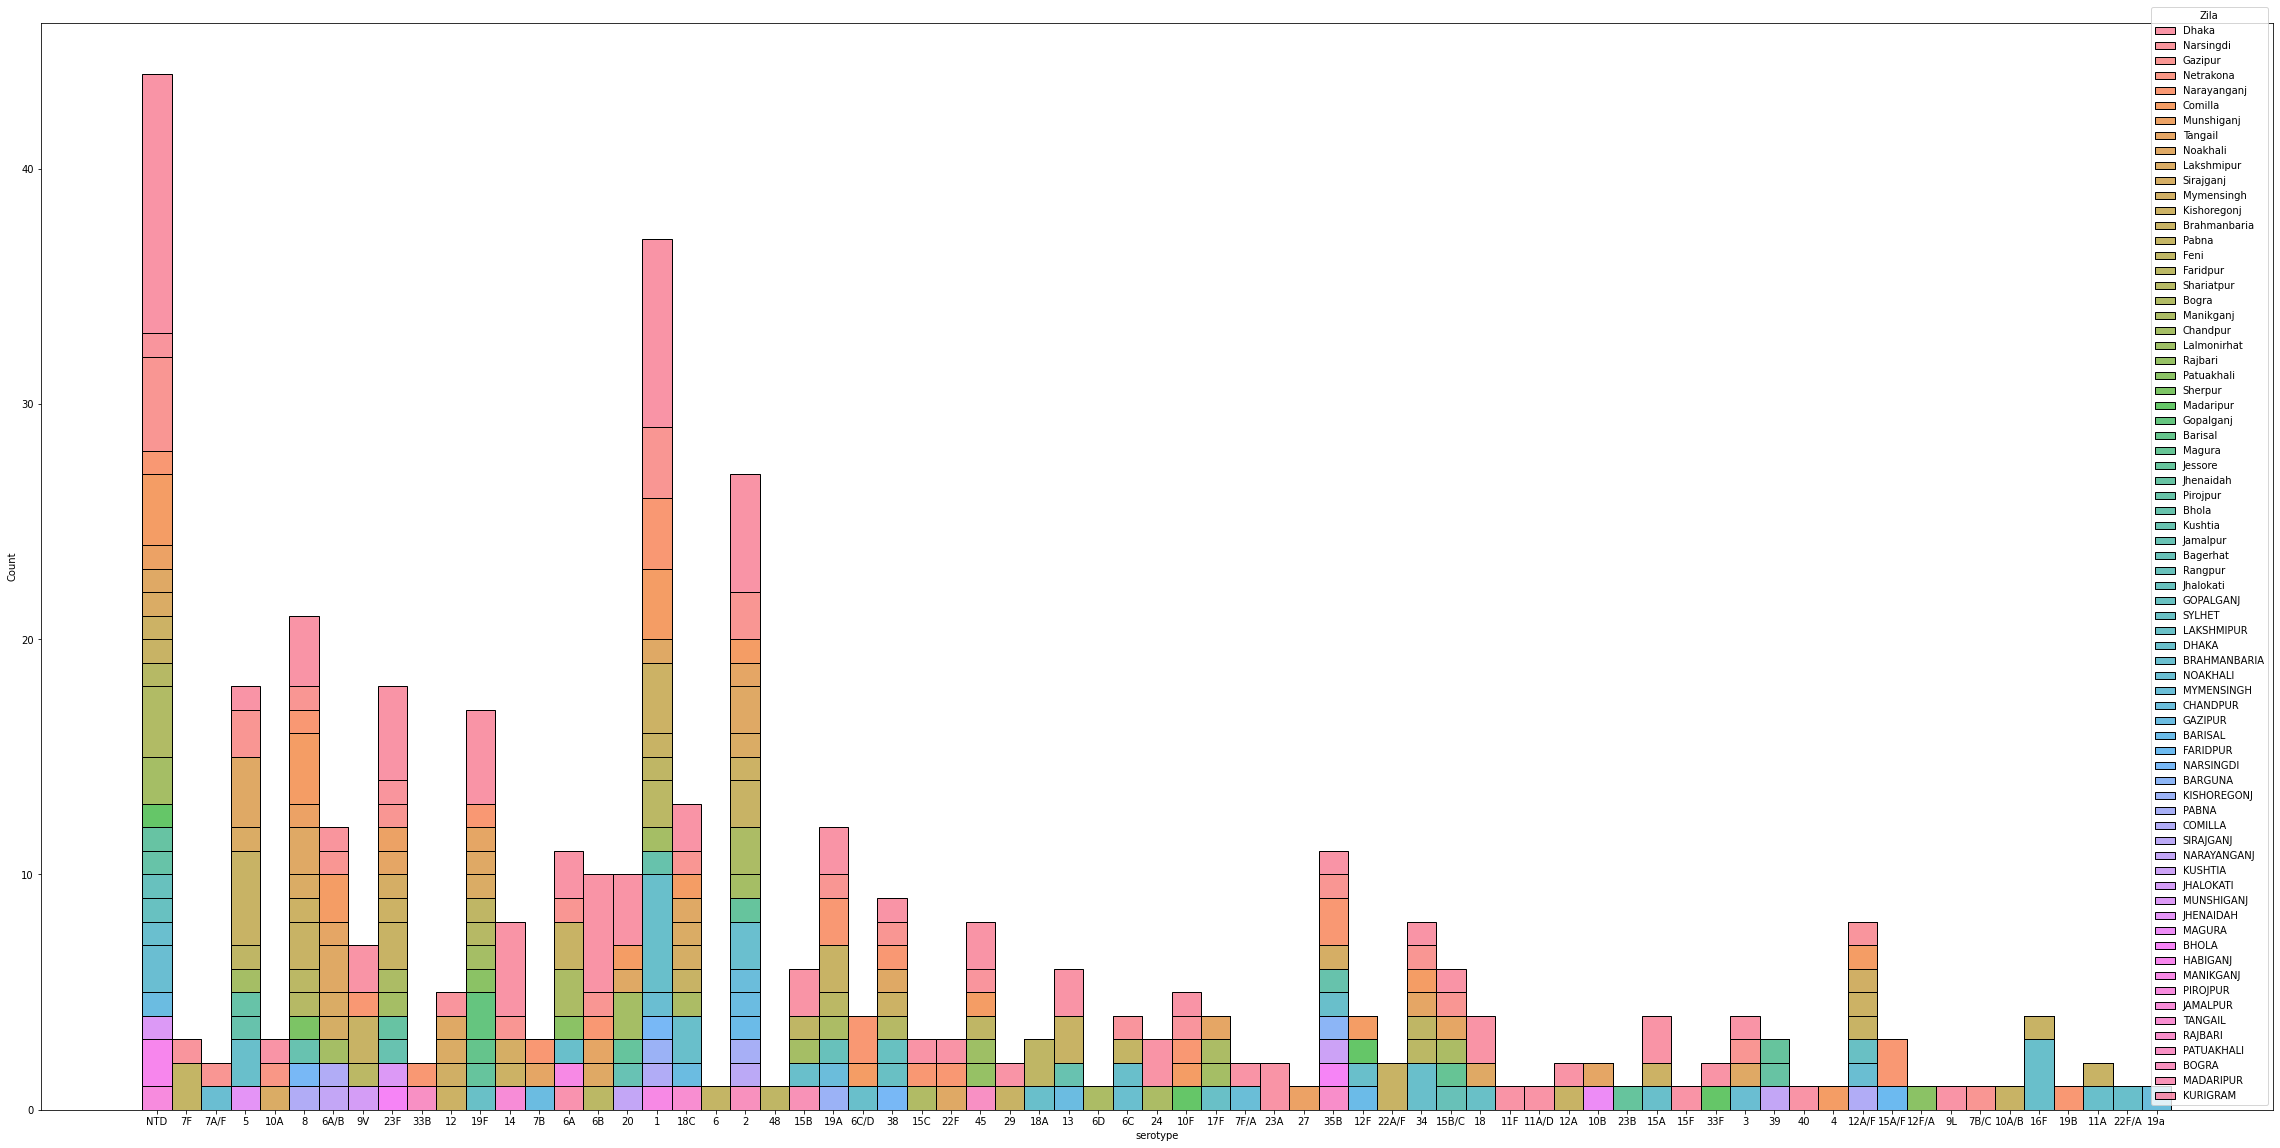

In [15]:
sns.histplot(binwidth=0.5, x="serotype", hue="Zila", data=df, stat="count", multiple="stack")

In [18]:
# importing necessary libraries
import pandas as pd
import numpy as np
!pip install kmodes
#!pip install matplotlib-venn
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 734.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 734.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 734.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 734.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 734.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 33, cost: 677.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8, cost: 705.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, i

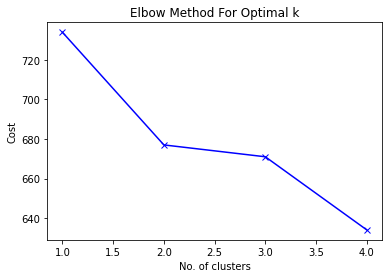

In [20]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()


Build a model with 3 clusters

In [21]:
# Building the model with 4 clusters
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24, cost: 676.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 679.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 13, cost: 649.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 31, cost: 639.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 17, cost: 681.0
Best run was number 4


array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3,
       0, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 2, 0, 0, 3, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 0, 3, 0, 2, 3, 1, 3, 0, 3, 0, 2, 3, 2, 0, 0, 0, 2, 0, 3, 3, 0,
       3, 3, 1, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 0, 3, 3, 0, 3, 1, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 3, 2, 1, 3, 3, 0, 0, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 3,
       0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 3, 0, 1, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0,
       0, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0,

In [22]:
df.insert(0, "Cluster", clusters, True)
df

,Cluster,Zila,serotype
0,0,Dhaka,NTD
2,0,Narsingdi,7F
3,0,Gazipur,7A/F
4,0,Gazipur,5
6,0,Netrakona,10A
...,...,...,...
470,1,DHAKA,5
471,1,DHAKA,1
472,1,NARSINGDI,1
473,1,MANIKGANJ,1
